In [ ]:
# библиотеки для предобработки данных
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import plotly.express as px
import datetime
%matplotlib inline

# библиоткеки для обучения

# from keras.models import Sequential
# from keras.layers import Activation, Dense
# from keras.layers import LSTM
# from keras.layers import Dropout

# **Обработка данных**


In [ ]:
# загрузим данные с диска - по ссылкам пока не работает
# url_apple = "https://github.com/hawk20434/Neural-network-lstm-model/blob/main/AAPL.csv"
# url_intel = "https://disk.yandex.ru/d/PDyDbaJGAiVSAA"
# url_jp_morgan = "https://disk.yandex.ru/d/_KAzYtQU7HBAcw"
# url_marsk = "https://disk.yandex.ru/d/i60ewu2Ksi3YBQ"
# url_visa = "https://disk.yandex.ru/d/B0uzRoQTTXp3-g"

In [ ]:
# самый большой датасет по акциям Apple - пока что загрузка в ручном режиме через функции коллаба
apple = pd.read_csv("/content/AAPL.csv" , sep=",", parse_dates=['Date'] )
# дополнительные датасеты для работы
# intel = pd.read_csv("INTC.csv", sep=",", parse_dates=['Date'])
# jp_morgan = pd.read_csv("JPM.csv", sep=",", parse_dates=['Date'])
# marsk = pd.read_csv("MRK.csv", sep=",", parse_dates=['Date'])
# visa = pd.read_csv("V.csv", sep=",", parse_dates=['Date'])

In [ ]:
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099874,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094663,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087715,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089886,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092492,73449600


In [ ]:
apple.shape

(10611, 7)

In [ ]:
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [ ]:
apple.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
apple.isnull().mean()

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

In [ ]:
apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10611.000000,10611.000000,10611.000000,10611.000000,10611.000000,1.061100e+04
mean,16.554691,16.742895,16.367136,16.561393,15.891529,3.274810e+08
std,35.254055,35.680681,34.834442,35.272444,34.949074,3.377912e+08
min,0.049665,0.049665,0.049107,0.049107,0.038213,0.000000e+00
25%,0.287444,0.294643,0.281072,0.287388,0.237612,1.213016e+08
50%,0.486607,0.493862,0.477679,0.486607,0.403960,2.145696e+08
75%,16.220536,16.335713,16.034820,16.165357,13.978872,4.066944e+08
max,182.630005,182.940002,179.119995,182.009995,180.959747,7.421641e+09


<Axes: xlabel='Date', ylabel='Close'>

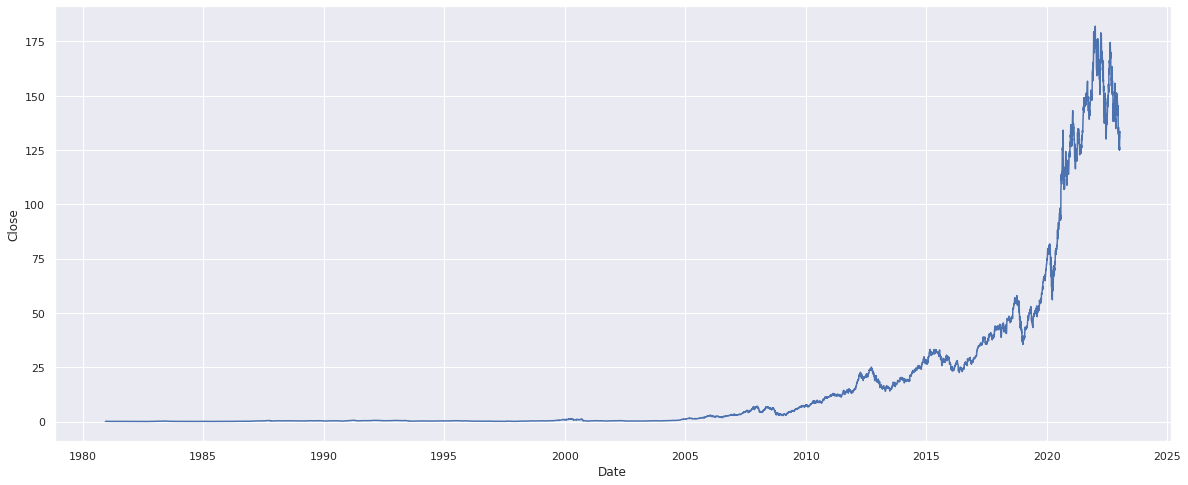

In [ ]:
# общий график всех акций
sns.set(rc={'figure.figsize':(20,8)})
sns.lineplot(data=apple, x="Date", y="Close")
# sns.lineplot(data=intel, x="Date", y="Close")
# sns.lineplot(data=jp_morgan, x="Date", y="Close")
# sns.lineplot(data=marsk, x="Date", y="Close")
# sns.lineplot(data=visa, x="Date", y="Close")

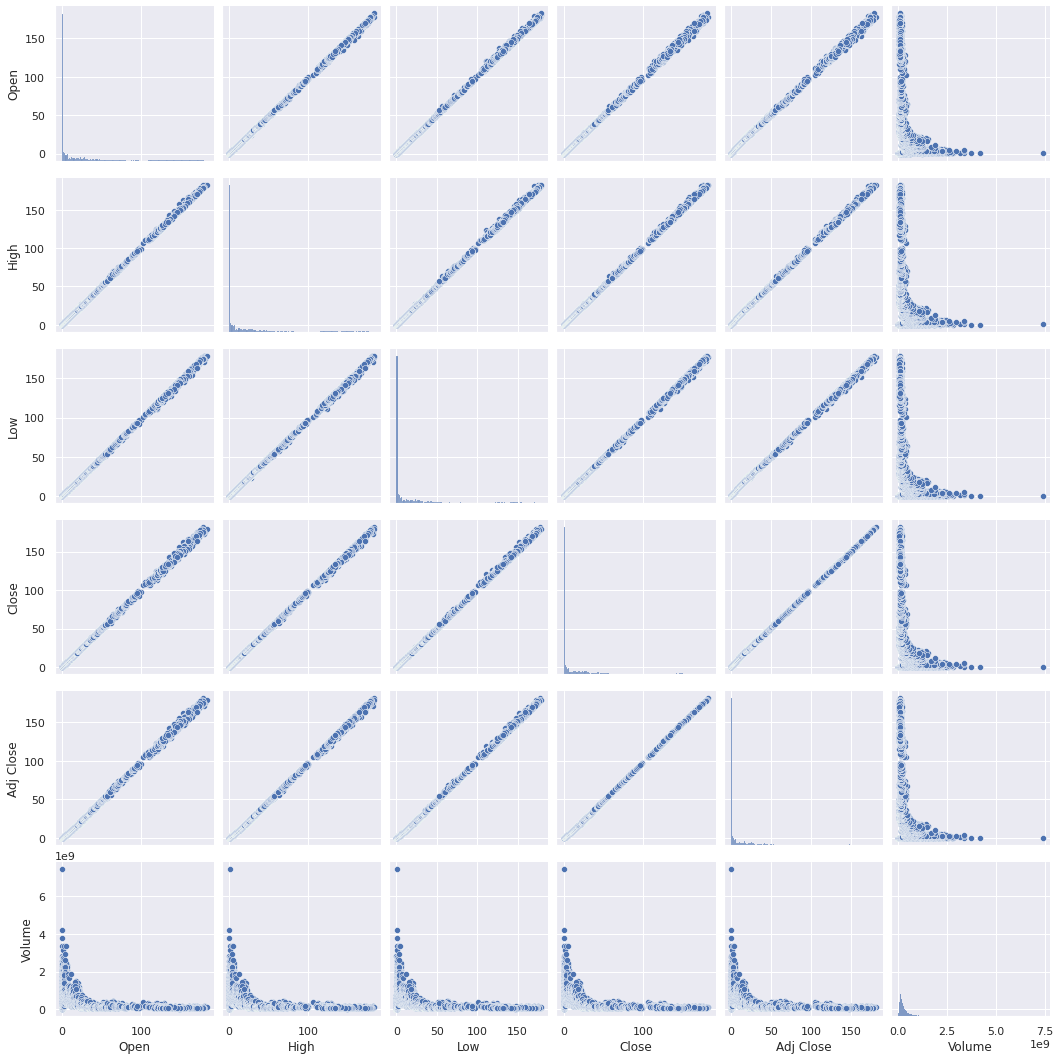

In [ ]:
# взаимосвзязи между признаками в акциях apple
sns.pairplot(apple)

In [ ]:
# копирование для сохранения исходного датасета
data = apple.copy()

<ipython-input-26-1adf78e0d14a>:17: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.fillna(data.mean(), inplace=True)


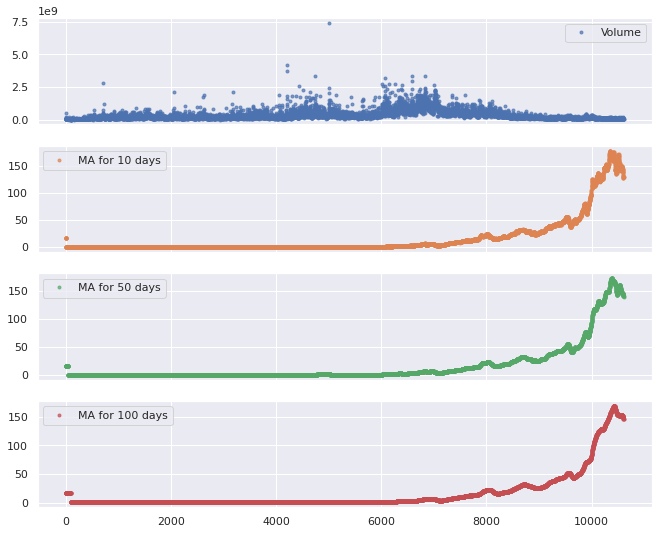

In [ ]:
# список значений для скользящего среднего
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

data['Daily Return'] = data['Close'].pct_change()

date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)

# востановление индексов
data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.sort_index(axis=1,ascending=True)

# визуализация данных
cols_plot = ['Volume','MA for 10 days','MA for 50 days','MA for 100 days']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)

<Axes: >

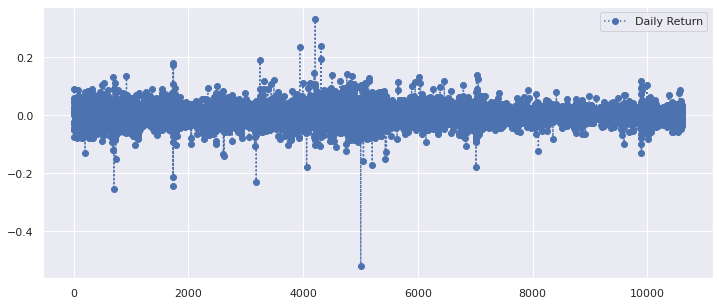

In [ ]:
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')

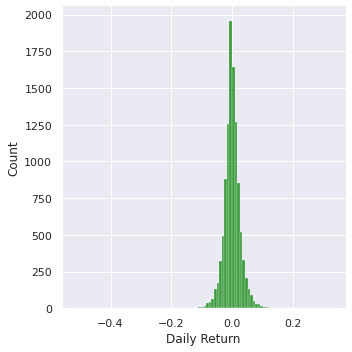

In [ ]:
sns.displot(data['Daily Return'].dropna(),bins=100,color='green')

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 50 days,MA for 100 days,Daily Return
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099874,469033600,16.520015,16.321836,16.053183,0.001062
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094663,175884800,16.520015,16.321836,16.053183,-0.052171
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087715,105728000,16.520015,16.321836,16.053183,-0.073398
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089886,86441600,16.520015,16.321836,16.053183,0.024751
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092492,73449600,16.520015,16.321836,16.053183,0.028992


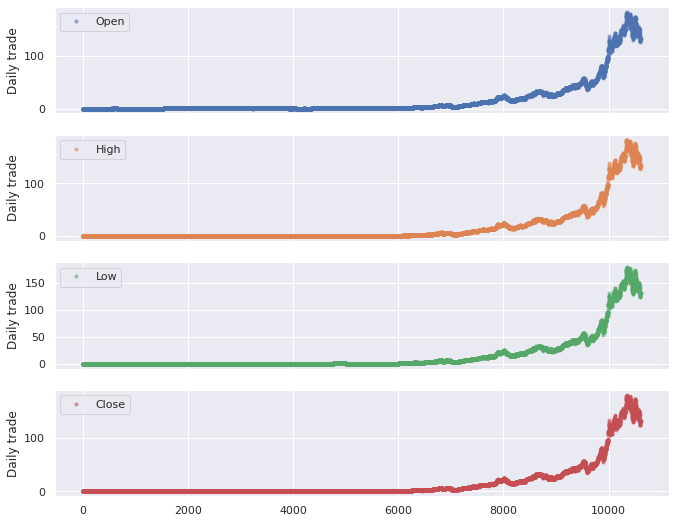

In [ ]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 50 days,MA for 100 days,Daily Return
count,10611.000000,10611.000000,10611.000000,10611.000000,10611.000000,1.061100e+04,10611.000000,10611.000000,10611.000000,10611.000000
mean,16.554691,16.742895,16.367136,16.561393,15.891529,3.274810e+08,16.520015,16.321836,16.053183,0.001062
std,35.254055,35.680681,34.834442,35.272444,34.949074,3.377912e+08,35.179832,34.725534,34.089649,0.028278
min,0.049665,0.049665,0.049107,0.049107,0.038213,0.000000e+00,0.053237,0.057947,0.063069,-0.518692
25%,0.287444,0.294643,0.281072,0.287388,0.237612,1.213016e+08,0.289098,0.294715,0.299895,-0.013114
50%,0.486607,0.493862,0.477679,0.486607,0.403960,2.145696e+08,0.485826,0.486295,0.494757,0.000000
75%,16.220536,16.335713,16.034820,16.165357,13.978872,4.066944e+08,16.163643,16.321836,16.053183,0.014706
max,182.630005,182.940002,179.119995,182.009995,180.959747,7.421641e+09,178.331999,172.663800,169.484800,0.332280


# Использование алгоритма прогнозирования временных рядов

LSTM - разновидность архитектуры рекуррентных нейронных сетей, предложенная в 1997 году Зеппом Хохрайтером и Юргеном Шмидхубером. Как и большинство рекуррентных нейронных сетей, LSTM-сеть является универсальной в том смысле, что при достаточном числе элементов сети она может выполнить любое вычисление, на которое способен обычный компьютер, для чего необходима соответствующая матрица весов, которая может рассматриваться как программа. В отличие от традиционных рекуррентных нейронных сетей, LSTM-сеть хорошо приспособлена к обучению на задачах классификации, обработки и прогнозирования временных рядов в случаях, когда важные события разделены временными лагами с неопределённой продолжительностью и границами. Относительная невосприимчивость к длительности временных разрывов даёт LSTM преимущество по отношению к альтернативным рекуррентным нейронным сетям, скрытым марковским моделям и другим методам обучения для последовательностей в различных сферах применения. - - - ПО СУТИ ПОДВИД RNN СЕТЕЙ C ВОЗМОЖНОСЬЮ ЗАПОМИНАТЬ ИНФОРМАЦИЮ.

ARIMA -  интегрированная модель авторегрессии, скользящего среднего, модель и методология анализа временных рядов. Является расширением моделей ARMA для нестационарных временных рядов, которые можно сделать стационарными взятием разностей некоторого порядка от исходного временного ряда (так называемые интегрированные или разностно-стационарные временные ряды).

# **Модель первая - rnn модель**

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
# для разделения выборок
from sklearn.model_selection import train_test_split

# построим RNN модель прогнозирования

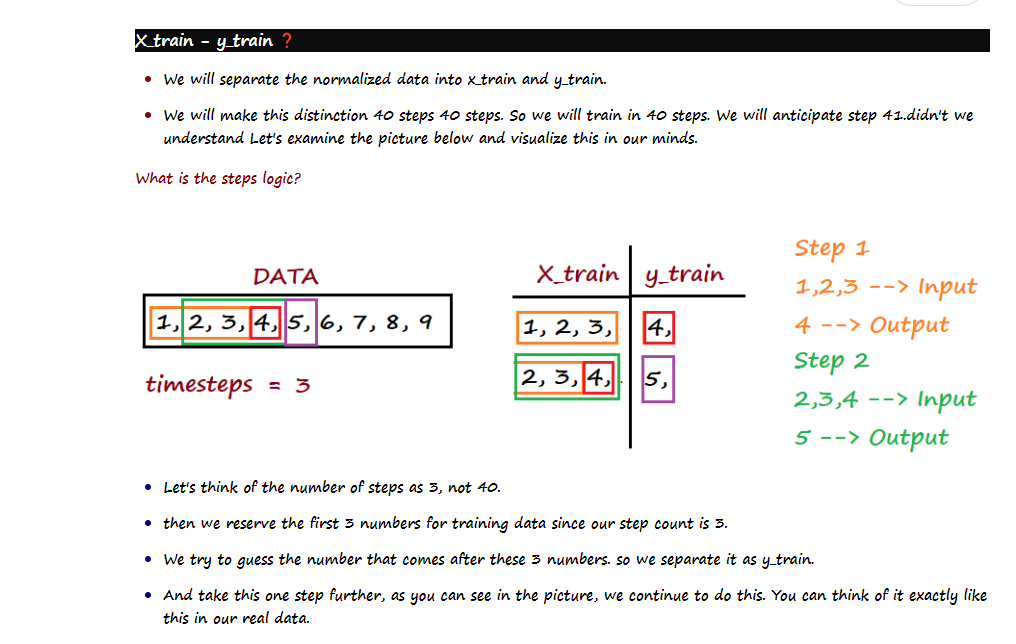

In [ ]:
data = data.query("Date >= '2010-01-01'")

In [ ]:
data.shape

(3280, 11)

In [ ]:
# разделим данные на тестовую и обучающую выборку в соотношении 80/20
training_size = int(len(data)*0.80)
data_len = len(data)
train = data[0:training_size]
test = data[training_size:data_len]

In [ ]:
print("Тестовая выборка --> ", training_size)
print("Общая размерность: --> ", data_len)
print("Выборка тренировочная --> ", len(train))
print("Выборка тестовая --> ", len(test))

Тестовая выборка -->  2624
Общая размерность: -->  3280
Выборка тренировочная -->  2624
Выборка тестовая -->  656


In [ ]:
train.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 50 days,MA for 100 days,Daily Return
7331,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515212,493729600,7.365178,7.131179,6.753946,0.015565
7332,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800,7.432857,7.137736,6.771471,0.001729


In [ ]:
train.Date.max()

Timestamp('2020-06-05 00:00:00')

In [ ]:
test.Date.max()

Timestamp('2023-01-12 00:00:00')

In [ ]:
train = train.loc[:, ["Open"]].values
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

In [ ]:
# попробуем реализовать rnn модель
end_len = len(train_scaled)
X_train = []
y_train = []
timesteps = 100
# timesteps = 40

for i in range(timesteps, end_len):
    X_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print("X_train --> ", X_train.shape)
print("y_train --> ", y_train.shape)

X_train -->  (2524, 100, 1)
y_train -->  (2524,)


In [ ]:
regressor = Sequential()

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer= "adam", loss = "mean_squared_error")

In [ ]:
# количество подоходов
epochs = 30
# размер выборки
batch_size = 50

In [ ]:
regressor.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/30
51/51 [==============================] - 6s 116ms/step - loss: 0.0016
Epoch 2/30
51/51 [==============================] - 5s 105ms/step - loss: 0.0013
Epoch 3/30
51/51 [==============================] - 5s 106ms/step - loss: 0.0014
Epoch 4/30
51/51 [==============================] - 6s 115ms/step - loss: 0.0015
Epoch 5/30
51/51 [==============================] - 5s 108ms/step - loss: 0.0013
Epoch 6/30
51/51 [==============================] - 6s 117ms/step - loss: 0.0014
Epoch 7/30
51/51 [==============================] - 5s 102ms/step - loss: 0.0014
Epoch 8/30
51/51 [==============================] - 6s 120ms/step - loss: 0.0013
Epoch 9/30
51/51 [==============================] - 5s 103ms/step - loss: 0.0014
Epoch 10/30
51/51 [==============================] - 6s 120ms/step - loss: 0.0012
Epoch 11/30
51/51 [==============================] - 5s 102ms/step - loss: 0.0014
Epoch 12/30
51/51 [==============================] - 6s 120ms/step - loss: 0.0014
Epoch 13/30
51/51 [======

In [ ]:
real_price = test.loc[:, ["Open"]].values
# смотрим размерность чтобы выставить в настройках тестовой выборки
print("Real Price Shape --> ", real_price.shape)

Real Price Shape -->  (656, 1)


In [ ]:
dataset_total = pd.concat((data["Open"], test["Open"]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)

In [ ]:
X_test = []
# параметр размерности тестовой выборки (656)
for i in range(timesteps, 750):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)

print("X_test shape --> ", X_test.shape)

X_test shape -->  (650, 100)


In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predict = regressor.predict(X_test)
predict = scaler.inverse_transform(predict)

21/21 [==============================] - 1s 24ms/step


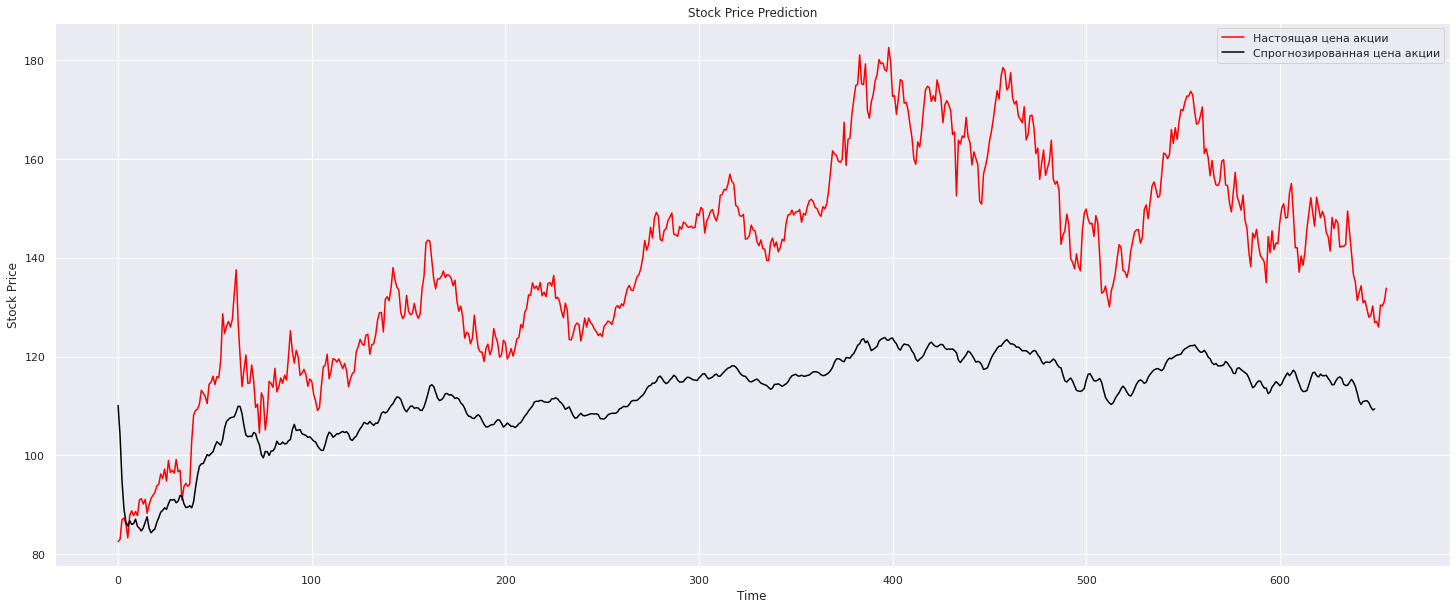

In [ ]:
plt.figure(figsize=(25, 10))
plt.plot(real_price, color = "red", label = "Настоящая цена акции")
plt.plot(predict, color = "black", label = "Спрогнозированная цена акции")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# **Модель вторая - arima модель**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
data2 = apple.copy()
data2 = data.query("Date >= '2010-01-01'")
data2.shape

(3280, 11)

In [ ]:
# разделим данные на тестовую и обучающую выборку в соотношении 80/20
# training_size = int(len(data)*0.80)
# data_len = len(data)
# train = data[0:training_size]
# test = data[training_size:data_len]

In [ ]:
# сделаем временной ряд
cols = ['Date','Open']
data2 = data2.loc[:,cols]
data2["Date"]=pd.to_datetime(data2["Date"])
data2 = data2.set_index("Date")
data2.head(3)

,Open
Date,
2010-01-04,7.622500
2010-01-05,7.664286
2010-01-06,7.656429


<Axes: xlabel='Date'>

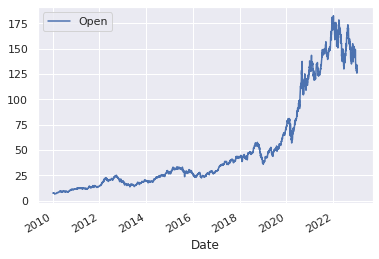

In [ ]:
data2.plot()

In [ ]:
# найдем d
result = adfuller(data2)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.095616
p-value: 0.949873


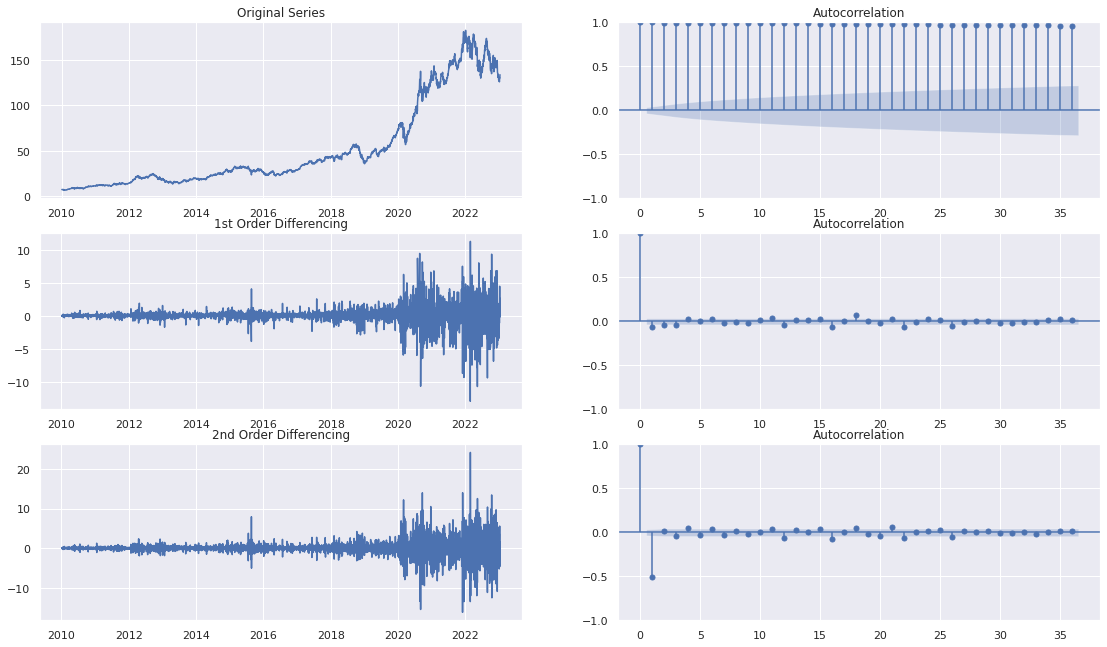

In [ ]:
# Original Series
fig, axes = plt.subplots(3, 2, figsize=(19, 11))
axes[0, 0].plot(data2)
axes[0, 0].set_title('Original Series')
plot_acf(data2, ax=axes[0, 1])
# 1st Differencing
axes[1, 0].plot(data2.diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(data2.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data2.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data2.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [ ]:
d = 1

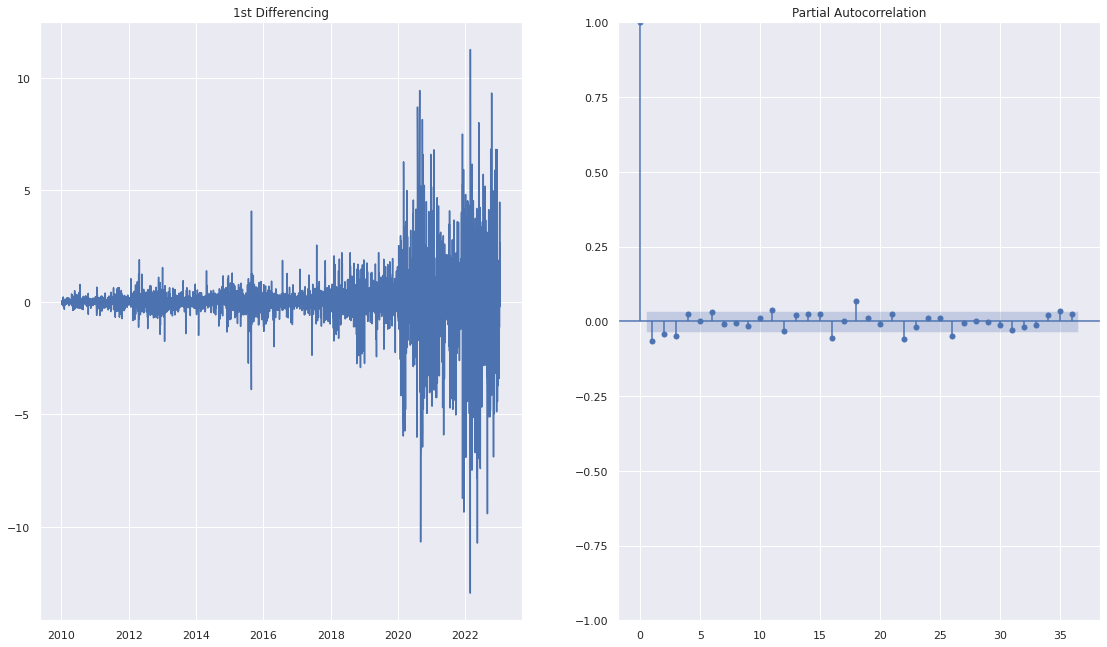

In [ ]:
# найдем p
fig, axes = plt.subplots(1, 2, figsize=(19, 11))
axes[0].plot(data2.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(data2.diff().dropna(), ax=axes[1])

plt.show() 

In [ ]:
p = 1

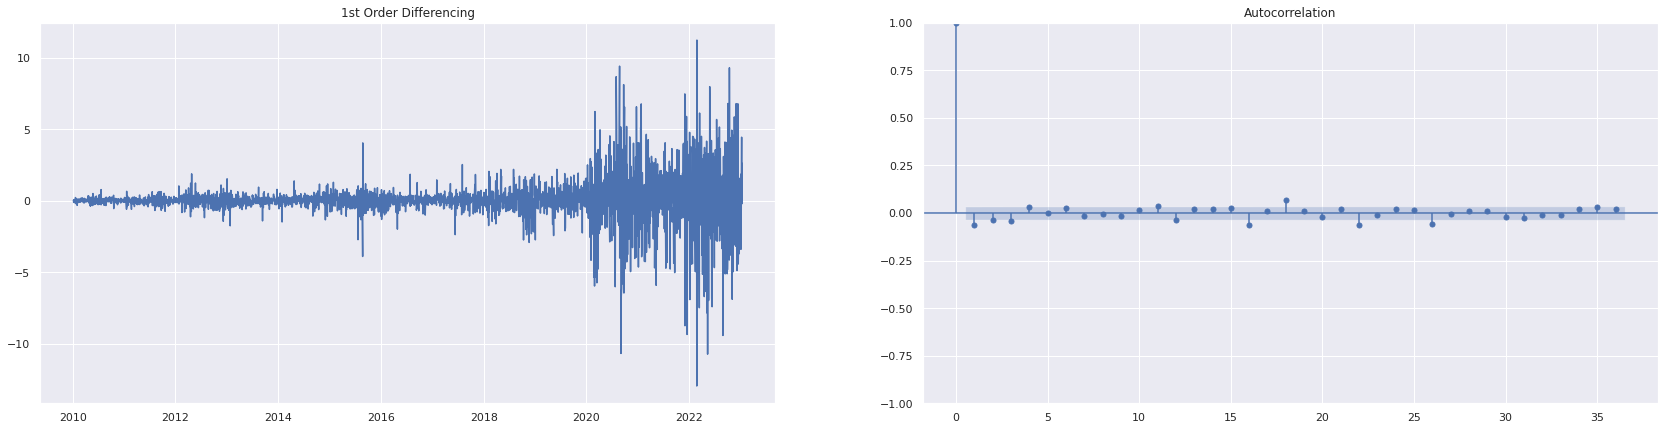

In [ ]:
# найдем q
fig, axes = plt.subplots(1, 2, figsize=(29,7))
# 1st Differencing
axes[0].plot(data2.diff())
axes[0].set_title('1st Order Differencing')
plot_acf(data2.diff().dropna(), ax=axes[1])
plt.show()

In [ ]:
q = 0

In [ ]:
# создание арима модели
model = ARIMA(data2, order=(d,p,q))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 3280
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -5865.086
Date:                Tue, 21 Mar 2023   AIC                          11734.171
Time:                        18:09:43   BIC                          11746.362
Sample:                             0   HQIC                         11738.536
                               - 3280                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0640      0.007     -8.830      0.000      -0.078      -0.050
sigma2         2.0948      0.019    110.425      0.000       2.058       2.132
Ljung-Box (L1) (Q):                   0.04   Jarque-

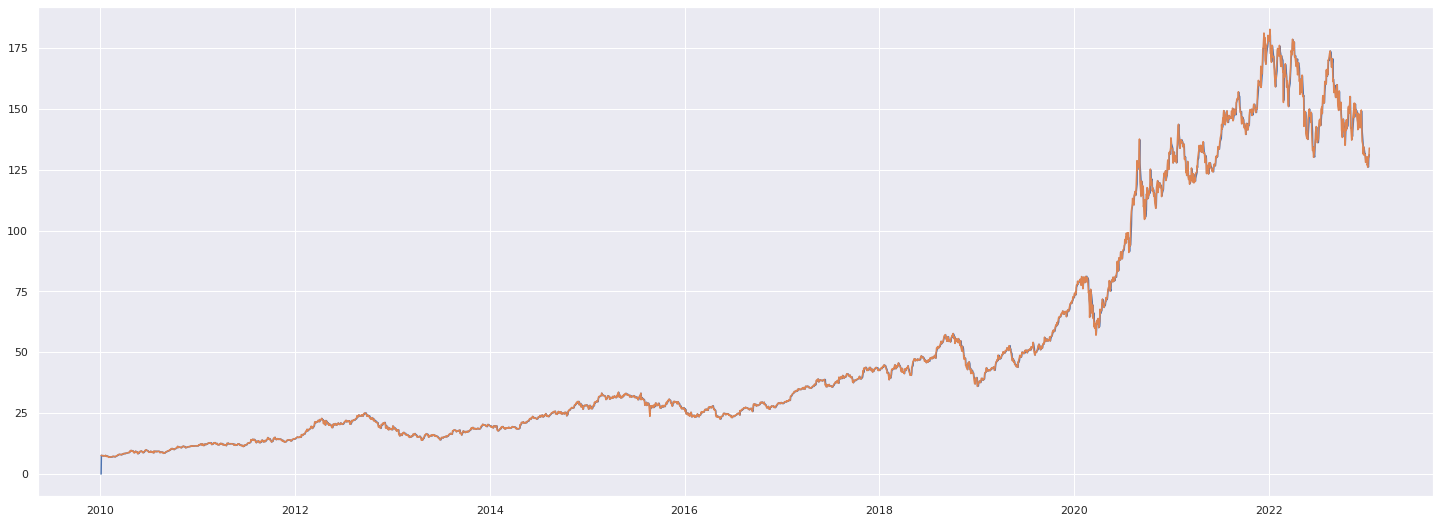

In [ ]:
# Actual vs Fitted
plt.figure(figsize=(25, 9))
X = model_fit.predict()

plt.plot(X,label='predicted')
plt.plot(data2,label='original')

plt.show()

# **Модель третья - arima модель в loginom**

- Выставлен прогноз на 1 год вперед
- Датасет отобрад с 2010-01-01 и по актульную дату
- Исселодования проводилась в рамках инструкций к логиному

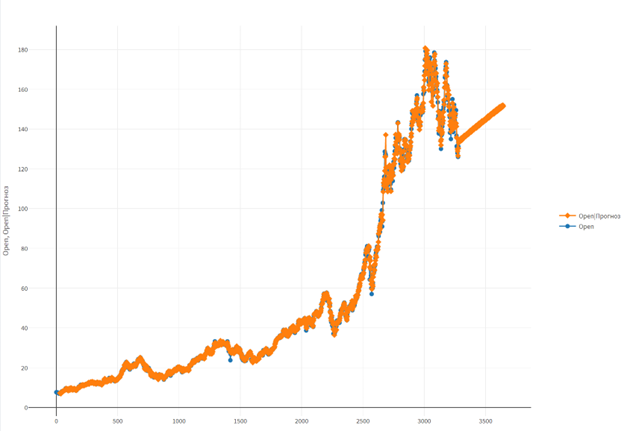

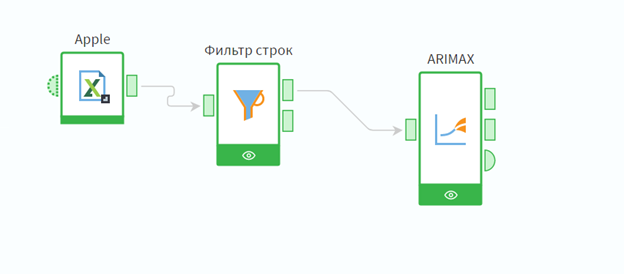